# **Iris Classificationm Using KNN**

# **Import Libraries**

In [ ]:
# Here are all imports that you will need
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split

# **Load the data from the file (iris.data) into the DataFrame. Set the names of columns according to the column definitions given in Data Description.**

In [ ]:
# Data download from sklearn
from sklearn.datasets import load_iris
data = load_iris().data
target = load_iris().target
df_data = pd.DataFrame(data,columns=['sepal_length','sepal_width','petal_length','petal_width'])
df_target = pd.DataFrame(target,columns=['target'])

#Merge two dataframe
df_combined = pd.concat([df_data, df_target], axis=1)

# **Data inspection.**

- Display the first 5 rows of the dataset and use any relevant functions that can help you to understand the data.

In [ ]:
df_combined.head(5)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df_combined.shape

(150, 5)

In [ ]:
df_combined.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
df_combined['target'].unique()

array([0, 1, 2])

- Prepare 2 scatter plots - `sepal_width` vs `sepal_length` and `petal_width` vs `petal_length`. Scatter plots should show each class in different color (`seaborn.lmplot` is recommended for plotting).

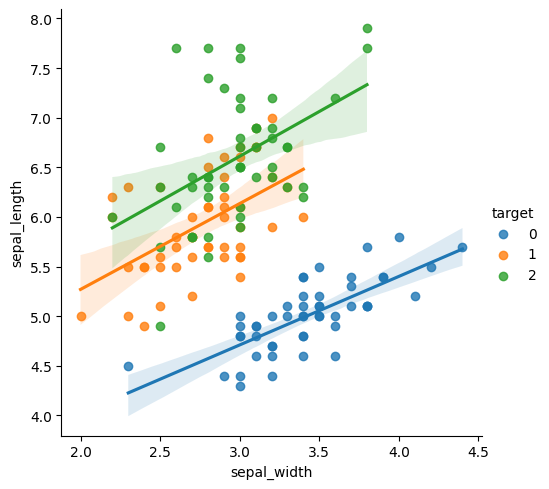

In [ ]:
#Plot sepal_width vs sepal_length
sns.lmplot(data=df_combined, x='sepal_width', y='sepal_length', hue = 'target')

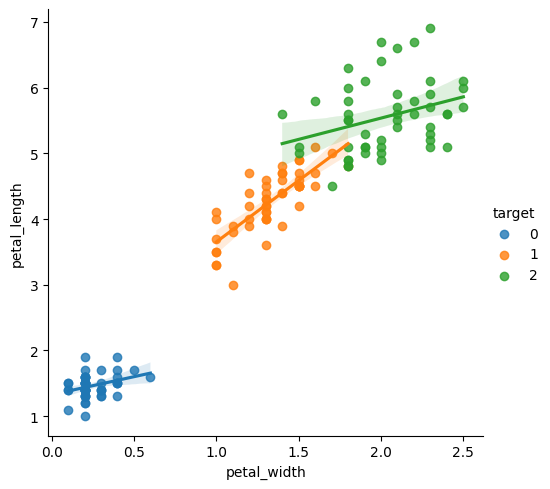

In [ ]:
#Plot petal_width vs petal_length
sns.lmplot(data=df_combined, x='petal_width', y='petal_length', hue = 'target')

# **Prepare the data for classification**.


- Using the pandas operators prepare the feature variables `X` and the response `Y` for the fit. Note that `sklean` expects data as arrays, so convert extracted columns into arrays.

In [ ]:
df_combined.columns.to_list()

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target']

In [ ]:
X = df_combined[['sepal_length',	'sepal_width',	'petal_length',	'petal_width']]
y = df_combined['target']

print(X.shape)
print(y.shape)

(150, 4)
(150,)


# **Split the data into train and test using sklearn train_test_split function.**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


# **Run the fit** using `KNeighborsClassifier` from `sklearn.neighbors`.


- First, instantiate the model,
- Then, run the classifier on the training set.

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.min(), X_train_scaled.max())
print(X_test_scaled.min(), X_test_scaled.max())

0.0 1.0
0.0 1.0


In [ ]:
%%time
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train_scaled, y_train)

CPU times: user 49.7 ms, sys: 11.9 ms, total: 61.6 ms
Wall time: 91.5 ms


KNeighborsClassifier(n_neighbors=3)

# **Use learning model to predict the class from features, run prediction on `X` from test part.**

- Show the **accuracy score** of the prediction by comparing predicted iris classes and the `Y` values from the test.

In [ ]:
y_pred = knn_clf.predict(X_test_scaled)
print(y_pred.shape)
y_pred

(30,)


array([0, 2, 1, 0, 2, 2, 1, 0, 2, 2, 2, 2, 1, 0, 1, 0, 2, 0, 1, 1, 0, 2,
       2, 1, 0, 0, 1, 0, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

1.0


- Comparing these two arrays (predicted classes and test `Y`), count the numbers of correct predictions and predictions that were wrong. (**HINTS:** `NumPy` arrays can be compared using `==` operator. You can also use `NumPy`'s operator `count_nonzero` to count number of non-False values).

In [ ]:
#Count the number of correct predictions
correct_predictions = np.count_nonzero(y_test == y_pred)

#Count the number of wrong predictions
wrong_predictions = np.count_nonzero(np.logical_not(y_test == y_pred))

#Print
print('The number of correct predictions is', correct_predictions)
print('The number of wrong predictions is', wrong_predictions)

The number of correct predictions is 30
The number of wrong predictions is 0


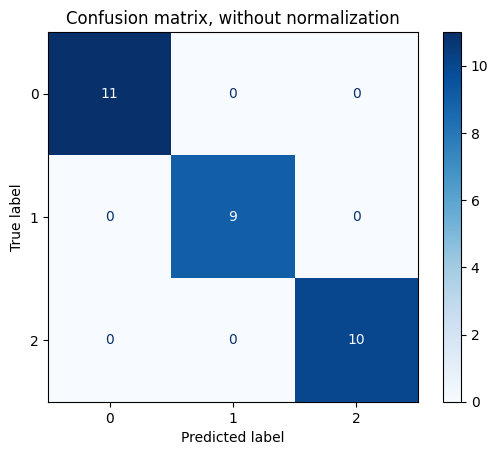

In [ ]:
#visualize classification results with confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
with plt.style.context("default"): #temporarily set the plot style
    disp = ConfusionMatrixDisplay.from_estimator(
        knn_clf,
        X_test_scaled,
        y_test,
        display_labels=[0, 1, 2],
        cmap=plt.cm.Blues,
        normalize=None,
    )
    disp.ax_.set_title("Confusion matrix, without normalization")

# In this task, we want to see how accuracy score and the number of correct predictions change with the number of neighbors `k`. We will use the following **number of neighbors `k`: 1, 3, 5, 7, 10, 20, 30, 40, and 50**:
- Generate 10 random train/test splits for each value of `k`
- Fit the model for each split and generate predictions
- Average the accuracy score for each `k`
- Calculate the average number of correct predictions for each `k` as well
- Plot the accuracy score for different values of `k`. What conclusion can you make based on the graph?

In [ ]:
k_vals = [1, 3, 5, 7, 10, 20, 30, 40, 50]
accuracy_vals = []
correct_vals = []

# Loop over the k values and generate 10 random train/test splits for each value of k
for k in k_vals:
    acc_list = []
    correct_list = []
    for i in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        scaler = MinMaxScaler()
        scaler.fit(X_train)
        X_train_scaled = scaler.transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        acc = accuracy_score(y_test, y_pred)
        acc_list.append(acc)
        correct_list.append(np.count_nonzero(y_pred == y_test))
    accuracy_vals.append(np.mean(acc_list))
    correct_vals.append(np.mean(correct_list))

In [ ]:
# Print the average number of correct predictions for each k
for i in range(len(k_vals)):
    print('k =', k_vals[i])
    print('The average number of correct predictions:', correct_vals[i])
    print('The average of accuracy score:', round(accuracy_vals[i],2))
    print('\n')

k = 1
The average number of correct predictions: 27.5
The average of accuracy score: 0.92


k = 3
The average number of correct predictions: 28.9
The average of accuracy score: 0.96


k = 5
The average number of correct predictions: 29.2
The average of accuracy score: 0.97


k = 7
The average number of correct predictions: 29.1
The average of accuracy score: 0.97


k = 10
The average number of correct predictions: 28.7
The average of accuracy score: 0.96


k = 20
The average number of correct predictions: 28.1
The average of accuracy score: 0.94


k = 30
The average number of correct predictions: 27.8
The average of accuracy score: 0.93


k = 40
The average number of correct predictions: 27.6
The average of accuracy score: 0.92


k = 50
The average number of correct predictions: 26.5
The average of accuracy score: 0.88




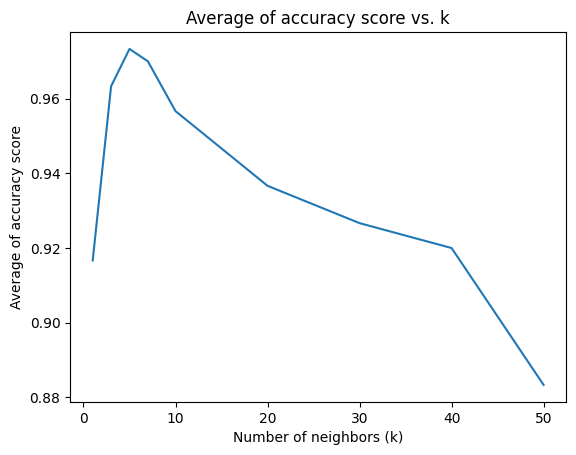

In [ ]:
# Plot the accuracy scores for different values of k
plt.plot(k_vals, accuracy_vals)
plt.xlabel('Number of neighbors (k)')
plt.ylabel('Average of accuracy score')
plt.title('Average of accuracy score vs. k')
plt.show()

# **Conclusion:**

Based on the plot and analysis of the average accuracy and number of correct predictions, we can conclude that selecting the optimal value of k for a KNN model is important.

The plot shows that the maximum average accuracy is achieved at k=5. However, increasing k beyond a certain point can lead to a decrease in accuracy. This is because when k is too high, the model may become too general and fail to capture the subtle differences between the data points.

Therefore, we need to strike a balance between accuracy and number of correct predictions while choosing the value of k. We could consider a k value between 3 to 10 to achieve a good balance between accuracy and number of correct predictions. It is also important to keep in mind that the optimal value of k may vary depending on the specific dataset and problem. Hence, further evaluation and experimentation may be necessary to find the best value of k.